# Pensamientos y Muertes

### Este programa está diseñado para calcular la probabilidad de que una persona A piense/sienta algo sobre otra persona B y la persona B muera en ese mismo día

### Primero partiremos introduciendo los datos básicos de población. 
1. Sabemos que hay 7,5 Giga humanos
2. Sabemos que 25% de los humanos son menores de 15 años [1]
3. Sabemos que al menos 10% de las personas tienen enfermedades mentales [2]
4. Sabemos que al menos 10% de las personas con enfermedades mentales son niños de 14 años o menos [8]

Para hacer este cálculo se tendrán que hacer algunas suposiciones:
1. Alguien podría pensar que solo la mitad de la población está despierta en un momento dado (ya que la mitad del mundo tiene sol en un momento dado), pero los cálculos los haremos para 24 horas por lo que todos alcanzan a estar despiertos en algún momento.
2. Vamos a sacar a personas con enfermedades mentales y a menores de 15, así no tenemos cosas como "se lo puede haber imaginado".

### Preámbulo
Importamos algunas cosas y agregamos los datos antes mencionados

In [3]:
#Importamos librerías para plotear y para calcular y hacer las cosas más bonitas
#%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as ipw
import IPython.display

In [14]:
def poblacion_usable(poblacion):
    awake     = poblacion
    menores   = awake * 0.25
    enfermos  = awake * (0.1-0.01)
    usables   = awake - menores - enfermos # sacamos a personas con enfermedades mentales y menores de 15 años.
    print('La cantidad de población conciente en un momento dado sin problemas mentales y mayor a 15 años es ', usables)
    return usables
poblacion = 7594000000
usables = poblacion_usable(poblacion)

La cantidad de población conciente en un momento dado sin problemas mentales y mayor a 15 años es  5012040000.0


### Establecemos la tasa de ocurrencia
Se necesita saber cuántas veces al año una persona tiene un pensamiento u emoción fuerte asociado a alguien que conozca, a esto le llamaremos "la sensación"
Para esto se le pedirá al usuario que introduzca cuantas veces al año ocurre "la sensación"

In [5]:
def ocurrencias(tasa_anual):
    poblacion = 7594000000
    usables = poblacion_usable(poblacion)
    tasa_diaria = (usables*tasa_anual)/365
    tasa_hora = tasa_diaria /24
    tasa_minuto = tasa_hora / 60
    tasa_segundo = tasa_minuto / 60
    print('Cantidad de personas piensan o tienen una emoción fuerte asociada a alguien que conocen (truncado sin decimal):')
    print('En cada día     :',int(tasa_diaria))
    print('En cada hora    :',int(tasa_hora))
    print('En cada minuto  :',int(tasa_minuto))
    print('En cada segundo :',int(tasa_segundo))

### Definimos los widgets

In [6]:
slider_tasa = ipw.IntSlider(
    min = 1,
    max = 365,
    step = 1,
    description = '# Veces'
)

In [7]:
slider_tasa_2 = ipw.IntSlider(
    min = 1,
    max = 365,
    step = 1,
    description = '# Veces',
    continuous_update = False
)

In [8]:
slider_conocidos = ipw.IntSlider(
    min = 1,
    max = 536,
    step = 1,
    description = 'Conocidos'
)

In [9]:
slider_conocidos_2 = ipw.IntSlider(
    min = 1,
    max = 536,
    step = 1,
    description = 'Conocidos',
    continuous_update = False
)

## Primera interacción

Con esto podemos comenzar a sospechar que va a ocurrir y nos podemos hacer una idea de como son los datos preliminares

In [10]:
print('¿Cuántas veces al año ocurre la sensación? ')
ipw.interactive(
    ocurrencias,
    tasa_anual=slider_tasa
)

¿Cuántas veces al año ocurre la sensación? 


interactive(children=(IntSlider(value=1, description='# Veces', max=365, min=1), Output()), _dom_classes=('wid…

## Algunos datos extra a considerar
1. A lo largo de 80 años una persona conoce en promedio unas 5000 pesonas en total. [3]
2. Una persona cualquiera conoce en general a 535 personas. [4]
3. persona cualquiera tiene en general 150 relaciones "cercanas" [5]
4. Al día mueren 147118 personas [6]
5. La esperanza de vida promedio mundial es de 72 años [7]

A continuación se deberá calcular la probabilidad de que el evento le ocurra a una persona cualquiera y la probabilidad de que le ocurra a al menos 1 conocido de una persona cualquiera, esto según los 3 datos de grupos de conocidos.

Para esto hay que tener en cuenta la siguiente ecuación


\begin{equation}
P\{\text{Ocurra una vez en N}\} = 1 - (1-p)^{N}
\end{equation}
Donde $P$ es la probabilidad de que algo ucirra al menos una vez de N ocaciones y  $p$ es la probabilidad de que ocurra en una ocación.

### Por ejemplo veamos la probabilidad de que en un dado de 6 caras lanzado 4 veces salga al menos una vez el 3

La probabilidad de obtener el 3 al lanzar un dado es de $\frac{1}{6}$, osea 1 de cada 6 veces. Pero si lanzo el dado 10 veces entonces la ecuación quedará

\begin{equation}
P\{\text{Ocurra una vez en 10}\} = 1 - (1-\frac{1}{6})^{10}
\end{equation}

cuyo resultado es: 0.838

In [11]:
#calculo del dado
print(  1-((1-(1/6))**10)  )

0.8384944171101543


In [12]:
#Agreamos datos
muertes = 147118

### Aplicando a nuestro caso
Basandonos en la ecuacion anteior y probabilidad básica tenemos las siguientes ecuaciones
1. La probabilidad de que alguien piense en otra persona y esa persona muera ese mismo día está dada por:

\begin{eqnarray}
Prob_{ocurre} = \frac{S}{U}\cdot\frac{M}{Pob}
\end{eqnarray}

Donde $S$ es la cantidad de personas que en un día cualquiera tienen "la sensación", $U$ es la cantidad de población disponible para que eso ocurra (despiertos, conscientes, etc), $M$ es la candtidad de muertes diarias y $Pob$ es la población mundial

2. La probabilidad de que esta situación le ocurra a una persona particular a lo largo de su vida es:

\begin{equation}
Prob_{persona} = 1-\left( 1-\frac{M}{Pob} \right)^{\left( \text{Tasa}\cdot\text{Edad} \right)}
\end{equation}

Donde $Tasa$ es la cantidad de veces que la sensación le ocurre a alguien en un año 

3. La probabilidad de que esta situación le ocurra a almenos 1 conocido de alguien a lo largo de su vida es:

\begin{equation}
Prob_{conocido} = 1-\left( 1-Prob_{persona} \right)^{\left(Conocidos\right)}
\end{equation}

## Interactuémos con los datos!

A continuación se generan unas barras para poder ver en tiempo real como afectan la cantidad de personas que conocemos y la cantidad de veces al año que podemos tener esta sensación misteriosa

In [15]:
def widget_datos(grupo, tasa_anual):
    prob_ocur_persona = 1-(1- muertes/poblacion)**(tasa_anual*72)
    prob_amigos = 1-(1-prob_ocur_persona)**(grupo)
    
    prob_ocur_persona_h = 1-(1- (muertes/24)/poblacion)**(tasa_anual*72)
    prob_amigos_h = 1-(1-prob_ocur_persona_h)**(grupo)
    
    prob_ocur_persona_m = 1-(1- (muertes/24/60)/poblacion)**(tasa_anual*72)
    prob_amigos_m = 1-(1-prob_ocur_persona_m)**(grupo)
    
    prob_ocur_persona_s = 1-(1- (muertes/24/60/60)/poblacion)**(tasa_anual*72)
    prob_amigos_s = 1-(1-prob_ocur_persona_s)**(grupo)
    
    tasa_diaria = (usables*tasa_anual)/365
    p_muerte_pensado = (tasa_diaria/usables)*(muertes/poblacion) #probabilidad de que una persona sea pensada y que muera
    prob_ocur_tu = 1-(1-muertes/poblacion)**(tasa_anual*95)
    prob_ocur_tu_h = 1-(1-(muertes/24)/poblacion)**(tasa_anual*95)
    prob_ocur_tu_m = 1-(1-(muertes/24/60)/poblacion)**(tasa_anual*95)
    prob_ocur_tu_s = 1-(1-(muertes/24/60/60)/poblacion)**(tasa_anual*95)
    print('---------------------')
    print('Para la cantidad de conocidos ',grupo)
    print('La probabilidad de que en 72 años conozcas a alguien que le haya ocurrido es ', prob_amigos)
    print('y si queremos que sea exacto a la hora, minuto o segundo? para un conocido que vive hasta los 72 años:')
    print('La probabilidad que sea exacto a la hora es ', prob_amigos_h)
    print('La probabilidad que sea exacto al minuto es ', prob_amigos_m)
    print('La probabilidad que sea exacto al segundo es ', prob_amigos_s)
    print('---------------------')
    print('---------------------')
    print('Al día ',p_muerte_pensado*tasa_diaria, ' personas tienen una sensasión sobre alguien que conocen y ese alguien muere')
    print('La probabilidad de que te ocurra a ti aluna vez en 95 años de vida es ', prob_ocur_tu)
    print('y si queremos que sea exacto a la hora, minuto o segundo? para alguien que vive 95 años:')
    print('La probabilidad que sea exacto a la hora es ', prob_ocur_tu_h)
    print('La probabilidad que sea exacto al minuto es ', prob_ocur_tu_m)
    print('La probabilidad que sea exacto al segundo es ', prob_ocur_tu_s)
    print('---------------------')

In [16]:
print('¡Aquí puedes interactuar con los datos!')
print('Elige número de conocidos entre 1 y 536')
print('Elige el número de veces al año que alguien tiene la sensación entre 1 y 365')
ipw.interactive(
    widget_datos,
    grupo = slider_conocidos,
    tasa_anual = slider_tasa,
)

¡Aquí puedes interactuar con los datos!
Elige número de conocidos entre 1 y 536
Elige el número de veces al año que alguien tiene la sensación entre 1 y 365


interactive(children=(IntSlider(value=1, description='Conocidos', max=536, min=1), IntSlider(value=1, descript…

## Gráfico interactivo!

### Pero primero, algunas funciones...

In [17]:
#definimos funcion Prob de tener un conocido que penso en alguien y esa persona murio, en funcion de la edad.
def prob_conocer(edad,grupo,tasa_anual):
    '''
    Probabilidad de concoer a alguien que le haya "pasado" (penso en alguien y esa persona murio), en funcion de la edad.
    '''
    prob_ocur_persona = 1-(1-muertes/poblacion)**(tasa_anual*(edad-15))
    prob_amigos = 1-(1-prob_ocur_persona)**(grupo)
    if edad>15:
        return prob_amigos
    else:
        return 0

In [18]:
#definimos algunas variables útiles y además la función que plotea el primer gráfico

def grafico1(grupo,tasa_anual):
    edades_numero  = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]
    plt.figure(figsize=(5,3), dpi=300)
    plt.plot(range(15,73),[prob_conocer(edad,grupo,tasa_anual) for edad in range(15,73)],label='15-72 años', 
             marker='.', linewidth=2, markersize = 2, markeredgecolor = 'w')
    plt.xlabel('Edad',fontdict={'fontname': 'Corbel', 'fontsize':13})
    plt.ylabel('Probabilidad de conocer a alguien que le haya pasado', 
               fontdict={'fontname': 'Corbel', 'fontsize':8})
    plt.title('Probabilidad por edad para '+str(tasa_anual)+' eventos al año',
              fontdict={'fontname': 'Corbel', 'fontsize':15})
    plt.xticks(edades_numero)
    plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
    plt.grid(b=True, which='major', color='#666666', linestyle='-')
    plt.show()

### Ahora sí, el gráfico!

Vamos a hacer un graficos, el primero será de la probabilidad de conocer a alguien que le ocurra según la edad que queramos.

In [19]:
#Lanzamos el gráfico con widgets
print('Puedes utilizar las barras para modificar el número de personas concidas')
print('y la cantidad de veces que al año una persona puede tener "la sensación".')
ipw.interactive(
    grafico1,
    grupo = slider_conocidos_2,
    tasa_anual = slider_tasa_2,
)

Puedes utilizar las barras para modificar el número de personas concidas
y la cantidad de veces que al año una persona puede tener "la sensación".


interactive(children=(IntSlider(value=1, continuous_update=False, description='Conocidos', max=536, min=1), In…

### Ahora con los datos más exactos...
A continuación intentaremos ser un poco más estrictos con los datos, esto significa que vamos a aumentar aún más la posibilidad de que esta situación sea una simple casualidad. Este segundo gráfico hará lo mismo pero con datos más exactos de cantidad de conocidos segun edad obtenidos de [3]

#### Primero obtenemos los datos

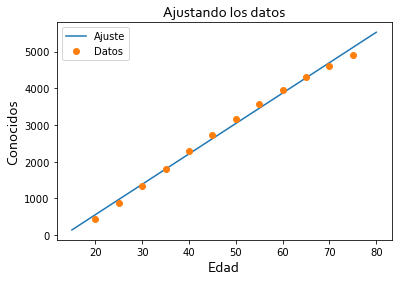

In [21]:
#Sabemos estos datos
edades_string  = ['20-25','25-30','30-35','35-40','40-45','45-50','50-55','55-60','60-65','65-70','70-75','75-80']
edades_numero  = [20     , 25    , 30    , 35    , 40    , 45    ,50     , 55    , 60    , 65    , 70    , 75  ]
conocidos      = [447    , 875   , 1327  , 1808  , 2282  , 2740  , 3173  , 3581  , 3958  , 4303  , 4611  , 4897]
#Pero también sabemos que la progresión es lineal por lo que muestra el gráfico de [3], por lo que le agregaremos 
#datos a mano para tener una curva más suave en el resultado.
#el rango será desde los 15 hasta los 80 años.

ed  = list(range(15,81))
funcion = np.polyfit(edades_numero,conocidos,1)
con = np.poly1d(funcion)
plt.figure()
plt.xlabel('Edad',fontdict={'fontname': 'Corbel', 'fontsize':15})
plt.ylabel('Conocidos',fontdict={'fontname': 'Corbel', 'fontsize':15})
plt.title('Ajustando los datos',fontdict={'fontname': 'Corbel', 'fontsize':15})
plt.plot(ed,con(ed),label='Ajuste')
plt.plot(edades_numero,conocidos,'o',label='Datos')
plt.legend()
plt.show()

#### Definimos funciones nuevas

In [22]:
def prob_conocer_2(edad,grupo,tasa_anual):
    '''
    Probabilidad de concoer a alguien que le haya "pasado" (penso en alguien y esa persona murio), en funcion de la edad.
    '''
    #Creamos vectores para modificar
    prob_ocur_persona = list(range(0, len(edad)))
    prob_amigos       = list(range(0, len(edad)))
    for i in range(len(edad)):
        prob_ocur_persona[i] = 1-(1-muertes/poblacion)**(tasa_anual*(edad[i]-15))
        prob_amigos[i] = 1-(1-prob_ocur_persona[i])**(grupo[i])
    if edad[0]>=15:
        return prob_amigos
    else:
        return 0

def grafico2(tasa_anual):
    y_fit=prob_conocer_2(ed,con(ed),tasa_anual)
    y=prob_conocer_2(edades_numero,conocidos,tasa_anual)
    plt.figure(figsize=(5,3), dpi=300)
    plt.plot(ed,y_fit, linewidth=2, color= 'orange', label='Curva Ajustada')
    plt.plot(edades_numero, y,
             marker='.', linewidth=2, markersize = 7, markeredgecolor = 'red',label='Curva Dura')
    plt.xlabel('Edad',fontdict={'fontname': 'Corbel', 'fontsize':13})
    plt.ylabel('Probabilidad de conocer a alguien que le haya pasado',fontdict={'fontname': 'Corbel', 'fontsize':8})
    plt.title('Probabilidad por edad para '+str(tasa_anual)+' eventos al año', fontdict={'fontname': 'Corbel', 'fontsize':15})
    plt.xticks(edades_numero)
    plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
    plt.grid(b=True, which='major', color='#666666', linestyle='-')
    plt.legend()
    plt.show()

def prob_conocer_3(edad,grupo, usables,muertes,tasa_anual):
    '''
    Probabilidad de concoer a alguien que le haya "pasado" (penso en alguien y esa persona murio), en funcion de la edad.
    '''
    prob_ocur_persona = np.zeros( shape=(len(edad),len(tasa_anual)) )  
    prob_amigos       = np.zeros( shape=(len(edad),len(tasa_anual)) )  
    for i in range(len(edad)):
        for j in range(len(tasa_anual)):
            prob_ocur_persona[i,j] = 1-(1-muertes/poblacion)**(tasa_anual[j]*(edad[i]-15))
            prob_amigos[i,j] = 1-(1-prob_ocur_persona[i,j])**(grupo[i])
    return prob_amigos
        


## 2do Gráfico Interactivo!

In [23]:
#Lanzamos el gráfico con widgets
print('Puedes utilizar las barras para modificar la cantidad de veces que al año una persona puede tener "la sensación".')
ipw.interactive(
    grafico2,
    tasa_anual = slider_tasa_2,
)

Puedes utilizar las barras para modificar la cantidad de veces que al año una persona puede tener "la sensación".


interactive(children=(IntSlider(value=5, continuous_update=False, description='# Veces', max=365, min=1), Outp…

## And for the grand finale
Ahora solo queda hacer un gráfico 3D donde se pueda ver como cambia la probabiliad segun la cantidad de eventos anuales y la edad.
Este gráfico no será interactivo porque ya tiene toda la información dentro de él

### Definimos algunas variables

In [24]:
#creamos los vectores que necesitaremos para generar la matriz
tasa_anual_2  = list(range(1,366))
tasa_diaria_2  = list(range(1,366))
for i in range(0,len(tasa_anual_2)):
    tasa_diaria_2 [i] = tasa_anual_2[i]*usables/365

#Generamos la matriz con los resultados
calculo = prob_conocer_3(ed,con(ed), usables,muertes,tasa_anual_2)

### Obtenemos el gráfico

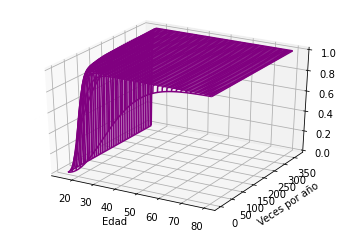

In [25]:
#Ahora a plotear
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')

#Generams una grilla sobre la cual exponer los resultados
X,Y = np.meshgrid(ed,tasa_anual_2)
#Transponemos los resultados para que calcen con la grilla
Z=np.transpose(calculo)
plt.xlabel('Edad')
plt.ylabel('Veces por año')
#plt.zlabel('Probabiliad')
#plt.title('Probabilidad por Edad por Eventos al Año')
ax.plot_wireframe(X,Y,Z, color='purple')

#ax.title =('Probabilidad por Edad y por Eventos al Año')
plt.show()



## Referencias

1. https://datos.bancomundial.org/indicador/SP.POP.0014.TO.ZS
2. https://ourworldindata.org/mental-health
3. https://elpais.com/tecnologia/2019/07/09/actualidad/1562709377_124629.html
4. https://observatoriosociallacaixa.org/-/cuantos-conocidos-tenemos
5. https://nationalpost.com/news/world/humans-only-able-to-maintain-five-relationships-in-their-inner-circle-and-150-in-their-outer-circle-study-finds
6. https://www.weforum.org/agenda/2020/05/how-many-people-die-each-day-covid-19-coronavirus/
7. https://www.google.com/search?q=esperanza+de+vida+promedio+mundial&oq=esperanza+de+vida+promedio&aqs=chrome.0.0j69i57j0l6.5203j0j7&sourceid=chrome&ie=UTF-8
8. https://www.mentalhealth.org.uk/statistics/mental-health-statistics-children-and-young-people


In [1]:
n=100
for i in range(n):
    if i >= n-1:
        print(i)

99
